In [94]:
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine learning 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()

#Maths
import math

#Set the options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
%matplotlib inline


In [9]:
# !pip install xgboost

In [10]:
# !pip install lightgbm

In [11]:
# pip install -U imbalanced-learn --user

In [5]:
DBT= pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [6]:
DBT

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [24]:
DBT.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [25]:
DBT['GenHlth'].unique()

array([5, 3, 2, 4, 1])

In [26]:
DBT.shape

(253680, 22)

In [27]:
DBT.isnull().sum()

Diabetes_binary    0
HighBP             0
HighChol           0
CholCheck          0
BMI                0
                  ..
DiffWalk           0
Sex                0
Age                0
Education          0
Income             0
Length: 22, dtype: int64

In [28]:
DBT.sum().sum()

16208198

In [29]:
DBT.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [30]:
DBT.dtypes

Diabetes_binary    int32
HighBP             int32
HighChol           int32
CholCheck          int32
BMI                int32
                   ...  
DiffWalk           int32
Sex                int32
Age                int32
Education          int32
Income             int32
Length: 22, dtype: object

In [31]:
DBT['Diabetes_binary'].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

In [32]:
DBT.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# CREATING A LIST IN PYTHON.

In [33]:
DIABETES=['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
DIABETES

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [17]:
#DBT.Diabetes_binary=DBT.Diabetes_binary.apply(lambda x:int(x))

# CHANGING ALL DATA TYPES FROM FLOAT TO INTEGER

In [34]:
DBT=DBT.astype(float).astype(int)
print (DBT.dtypes)

Diabetes_binary    int32
HighBP             int32
HighChol           int32
CholCheck          int32
BMI                int32
                   ...  
DiffWalk           int32
Sex                int32
Age                int32
Education          int32
Income             int32
Length: 22, dtype: object


# TO SAVE AN IMAGE IN PYTHON, (STILL CHECK IT OUT LATER)

In [19]:
# plt.savefig('heatchart.png')

In [35]:
R=DBT.corr()
R

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DiffWalk,0.218344,0.223618,0.144672,0.040585,0.197078,0.122463,0.176567,0.212709,-0.253174,-0.048352,-0.080506,-0.037668,0.007074,0.118447,0.456920,0.233688,0.478417,1.000000,-0.070299,0.204450,-0.192642,-0.320124
Sex,0.031430,0.052207,0.031205,-0.022115,0.042950,0.093662,0.002978,0.086096,0.032482,-0.091175,-0.064765,0.005740,-0.019405,-0.044931,-0.006091,-0.080705,-0.043137,-0.070299,1.000000,-0.027340,0.019480,0.127141
Age,0.177442,0.344452,0.272318,0.090321,-0.036618,0.120641,0.126974,0.221618,-0.092511,0.064547,-0.009771,-0.034578,0.138046,-0.119777,0.152450,-0.092068,0.099130,0.204450,-0.027340,1.000000,-0.101901,-0.127775
Education,-0.124456,-0.141358,-0.070802,0.001510,-0.103932,-0.161955,-0.076009,-0.099600,0.199658,0.110187,0.154329,0.023997,0.122514,-0.100701,-0.284912,-0.101830,-0.155093,-0.192642,0.019480,-0.101901,1.000000,0.449106


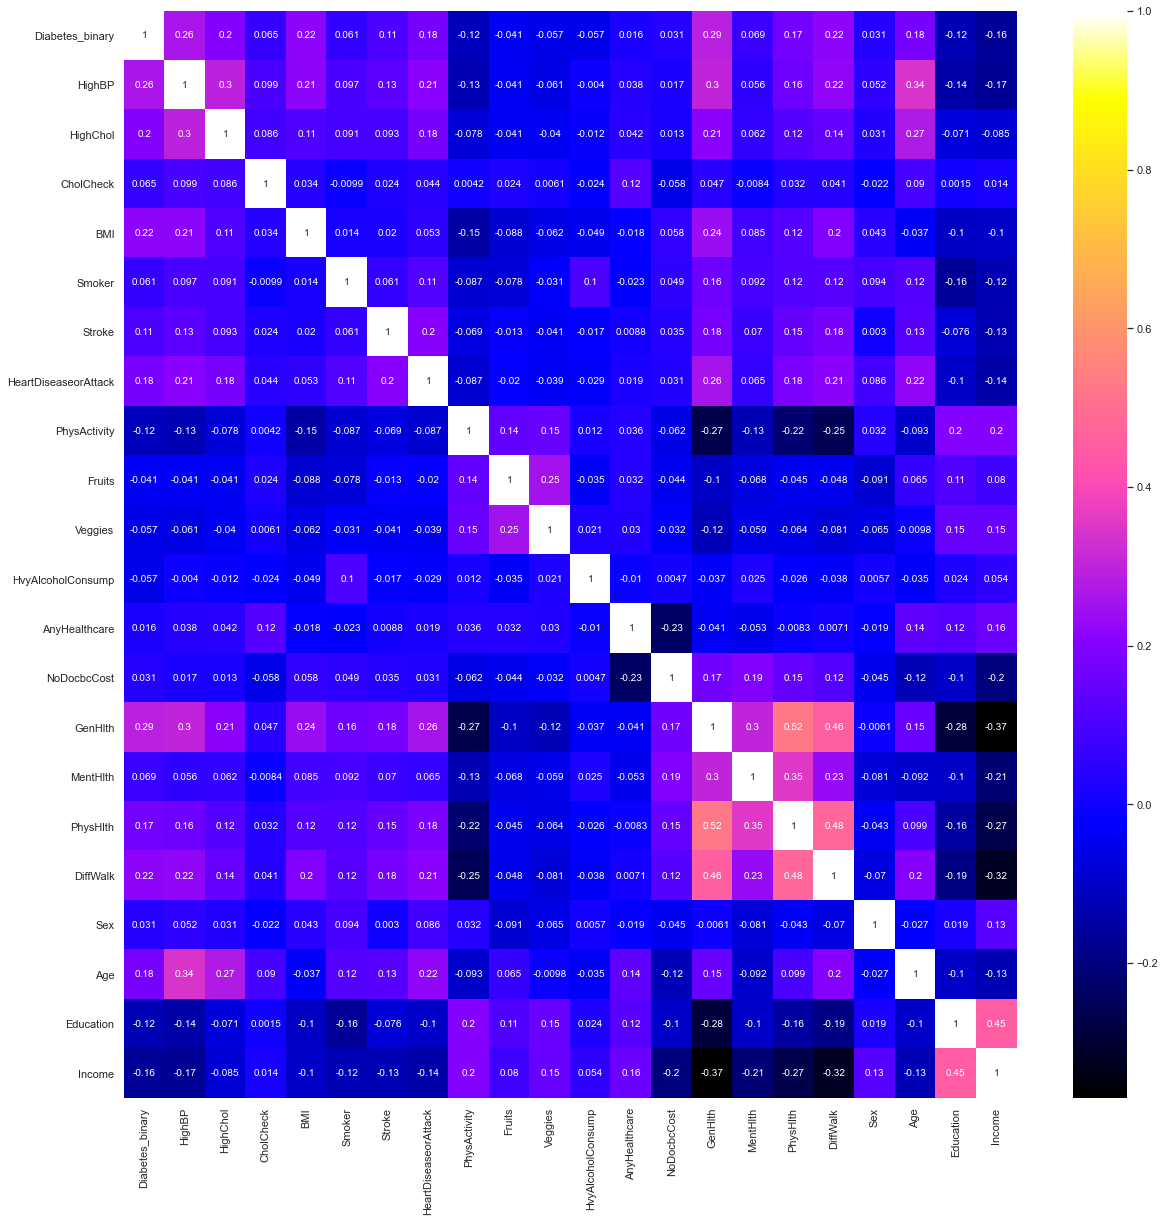

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(R, annot=True, cmap='gnuplot2')
plt.savefig('heatchart.png')

# No multicollinerity found.

# FEATURE SCALING

In [36]:
scaler = StandardScaler()

X=DBT.drop('Diabetes_binary', axis=1) #assign all features to X

y = DBT['Diabetes_binary'] #assing the target to variable Y

In [37]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,Y)

imp=pd.DataFrame(mutual_info_classif(X,Y), index=X.columns)

imp

imp.columns=['Importance']

imp.sort_values(by='Importance', ascending=False)  #There is ctually no importance cos none of the values are close to 1.

# This says that there is no relationship between the features measured and DIABETES.


,Importance
GenHlth,0.054287
CholCheck,0.046561
AnyHealthcare,0.042218
HighBP,0.041582
PhysActivity,0.037003
...,...
Sex,0.008956
MentHlth,0.003871
Stroke,0.003468
HvyAlcoholConsump,0.002377


In [38]:
imp[imp['Importance']>=0.03].sort_values(by='Importance', ascending=False)

,Importance
GenHlth,0.054287
CholCheck,0.046561
AnyHealthcare,0.042218
HighBP,0.041582
PhysActivity,0.037003
Veggies,0.034583


In [39]:
X=X[['GenHlth', 'CholCheck','AnyHealthcare', 'HighBP','PhysActivity','Veggies']] #Feature selection
X

,GenHlth,CholCheck,AnyHealthcare,HighBP,PhysActivity,Veggies
0,5,1,1,1,0,1
1,3,0,0,0,1,0
2,5,1,1,1,0,0
3,2,1,1,1,1,1
4,2,1,1,1,1,1
...,...,...,...,...,...,...
253675,3,1,1,1,0,1
253676,4,1,1,1,0,0
253677,1,1,1,0,1,0
253678,3,1,1,1,0,1


In [40]:
scaler.fit(X)

StandardScaler()

In [41]:
X = scaler.transform(X) #notice we drop away the target before applying the transform.

In [42]:
X[0]

array([ 2.32912057,  0.19692156,  0.22686264,  1.15368814, -1.76281393,
        0.48208665])

# TRAIN-TEST SPLIT

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [44]:
input_ml_algo = 'LR' #MEANS input machine learning algorithm

In [45]:
# select the algorithm according to the input provided

def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo=='RF':
        model=RandomForestCalssifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo == 'LR':
        model=LogisticRegression()
    return model

In [98]:
model=model_to_use('LR')
model

LogisticRegression()

In [166]:
# TRAINING THE MODEL

model.fit(X_train, Y_train)

model

LogisticRegression()

# Predict probability for test dataset


In [67]:
Y_pred = model.predict(X_test)

Y_pred_prod = model.predict_proba(X_test)
Y_pred_prod = [X[1] for X in Y_pred_prod]
print('Y predicted:', Y_pred)
print('Y probability predicted:', Y_pred_prod[:5])

Y predicted: [0 0 0 ... 0 0 0]
Y probability predicted: [0.05159135719105164, 0.043140308615414354, 0.08696627895379004, 0.2021610489161462, 0.027978934282935845]


In [68]:
Y_pred = model.predict(X_test)

Y_pred_prod = model.predict_proba(X_test)
Y_pred_prod = [X[0] for X in Y_pred_prod]
print('Y predicted:', Y_pred)
print('Y probability predicted:', Y_pred_prod[:5])

Y predicted: [0 0 0 ... 0 0 0]
Y probability predicted: [0.9484086428089483, 0.9568596913845856, 0.91303372104621, 0.7978389510838538, 0.9720210657170641]


# model evaluation

## Get the evaluation metrics to evaluate the performance of model on testing data

# ACCURACY SCORE when theres is inabalance of data might not be accurate. Eg; for DIABETIC DATAST, if the data is skewed. The method to balance the dataset is through RANDOM SAMPLING


 Accuracy Score : 
  0.8609140124040786

 AUC Score : 
  0.5

 Confusion Matrix : 
  [[65519     0]
 [10585     0]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.86      1.00      0.93     65519
           1       0.00      0.00      0.00     10585

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104


 ROC curve : 



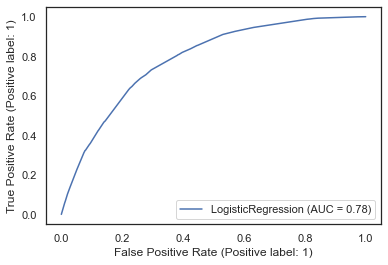

In [170]:
def compute_evaluation_metric(MODEL, X_test, Y_actual, Y_predicted, Y_predicted_prob):
    print("\n Accuracy Score : \n ", accuracy_score(Y_actual,Y_predicted))
    print("\n AUC Score : \n ", roc_auc_score(Y_actual,Y_predicted))
    print("\n Confusion Matrix : \n ", confusion_matrix(Y_actual,Y_predicted))
    print("\n Classification Report : \n ", classification_report(Y_actual,Y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, Y_actual)
    plt.show()
compute_evaluation_metric(model, X_test, Y_test, Y_pred, Y_pred_prod)


 Accuracy Score : 
 0.8609140124040786

 AUC Score : 
 0.5

 Confusion Matrix : 
 [[65519     0]
 [10585     0]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     65519
           1       0.00      0.00      0.00     10585

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104


 ROC curve : 



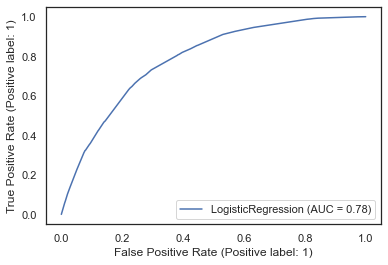

In [171]:
def compute_evaluation_metric(model, X_test, Y_actual, Y_predicted, Y_predicted_prob):
    print('\n Accuracy Score : \n', accuracy_score (Y_actual, Y_predicted))
    print('\n AUC Score : \n', roc_auc_score(Y_actual, Y_predicted))
    print('\n Confusion Matrix : \n', confusion_matrix(Y_actual, Y_predicted))
    print('\n Classification Report : \n', classification_report(Y_actual, Y_predicted))
                                              
    print('\n ROC curve : \n')
    sns.set_style('white')
    plot_roc_curve(model, X_test, Y_actual)
    plt.show()
compute_evaluation_metric(model, X_test, Y_test, Y_pred, Y_pred_prod)

# OPTIMIZATION 20 02 2022

# Handle class imnbalance: INVOLVES DISPROPORTIONATE RATE OF OBSERVATIONS IN EACH CLASS.

# The best thing to do is to UPSAMPLE the data, this is by duplicating certain numbers to make up for the imbalance.
# save the final model

# 

In [ ]:
DBT['Diabetes_binary '].

# Imbalanced data

In [104]:
Y.value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

In [60]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,Y)

y_ros.value_counts()

1    218334
0    218334
Name: Diabetes_binary, dtype: int64

In [70]:
def classification_model(X, y):
    
    x = scaler.fit_transform(X)
    
    #Split the dataset into the training set and test set.
    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3,random_state=123)
    
    #Training the model:
    model.fit(X_train, y_train)
    
    #Predict class for test dataset
    y_pred = model.predict(X_test)
    
    #Predict probability for test dataset 
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    #compute Evaluation metric
    compute_evaluation_metric(model, x_test, y_test, y_pred, y_pred_prod)
    return model

# TO INCREASE PRECISION SCORE, Increase the probability threshold
# TO INCREASE RECALL SCORE, reduce the probanility score 

In [102]:
#Define the parameters grid for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],
                            'max_depth':[10, 15, 20, 30, 40 ,50],
                            'min_samples_leaf': [1,2,5]
                           }

#Define the parameters grid for random forest
param_grid_random_forest = {'max_depth': [10, 20, 40],
                           'n_estimators': [100,200,300],
                           'min_samples_leaf': [1,2,5]
                           }
#Define the parameters grid for XGBoost
param_grid_lgbm = {'min_child_weight': [1,5,10],
                   'gamma': [0,1],
                   'max_depth': [5,10],
                   'learning_rate': [0.05, 0.1]
                  }
#Define the parameters grid for LGBM
param_grid_lgbm = {'n_estimators': [100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5,8,10],
                   'learning_rate': [0.05, 0.1]
                  }

In [77]:
def param(input_ml_algo):
    if input_ml_algo == 'DT':
        model=DecisionTreeClassifier()
        param_grid = param_grid_decision_tree
    
    elif input_ml_algo == 'RF':
        model=RandomForestClassifier()
        param_grid = param_grid_random_forest
    
    elif input_ml_algo == 'XGBC':
        model=XGBClassifier()
        param_grid = param_grid_xgb
    
    elif input_ml_algo == 'LGBMC':
        model=LGBMClassifier()
        param_grid = param_grid_lgbm
    return param_grid
# Note that there is no Logistics regression in the list of models. This is because optimizing Logistics regression is entirly different.

In [83]:
model=model.predict

In [78]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [79]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [81]:
grid = GridSearchCV(model, param_grid_decision_tree, refit = True, verbose=3, n_jobs=-1)

#Fit the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5]},
             verbose=3)

In [82]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

In [86]:
Y_pred = grid.predict(X_test)

#Predict probability for test dataset
Y_pred_prod = grid.predict_proba(X_test)
Y_pred_prod = [X[1] for X in Y_pred_prod]
print('Y predicted:', Y_pred)
print('Y probability predicted:', Y_pred_prod[:5])

Y predicted: [0 0 0 ... 0 0 0]
Y probability predicted: [0.048452866394818904, 0.034790066373331346, 0.11092380310182064, 0.2236842105263158, 0.018609742747673783]



 Accuracy Score : 
 0.8609140124040786

 AUC Score : 
 0.5

 Confusion Matrix : 
 [[65519     0]
 [10585     0]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     65519
           1       0.00      0.00      0.00     10585

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104


 ROC curve : 



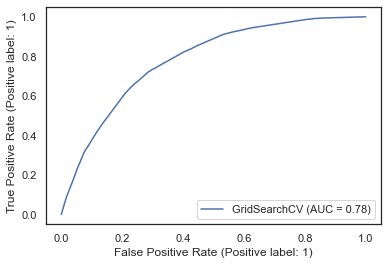

In [101]:
compute_evaluation_metric(grid, X_test, Y_test, Y_pred, Y_pred_prod)

# SAVE THE FINAL MODEL

## You can save the model in local disk and use it whenever you want

In [115]:
import pickle

In [167]:
#save the model to disk

pickle.dump(model, open('class_model.pkl','wb'))

pickle.dump(scaler, open('scaler2.pkl', 'wb'))

SyntaxError: invalid syntax (<ipython-input-118-b534b6aed18a>, line 1)

In [186]:
%%writefile dapp.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image

st.write("""
# DIABETES STATUS PREDICTION APP
""")

image = Image.open('Diabetes IMAGE.jpg')
st.image(image)

model=pickle.load(open('class_model.pkl', 'rb'))
scaler=pickle.load(open('scaler2.pkl', 'rb'))

st.sidebar.header('User Input Parameters')

def user_input_features():
    GenHlth= st.selectbox('Health Rating',('Excellent','Good','Stable','Bad','Critical'))
    if GenHlth=='Excellent':
        GenHlth=5
    if GenHlth=='Good':
        GenHlth=4
    if GenHlth=='Stable':
        GenHlth=3
    if GenHlth=='Bad':
        GenHlth=2
    else:
        GenHlth=1
    CholCheck = st.selectbox('Cholesterol Level',('High','Low'))
    if CholCheck=='High':
        CholCheck=1
    else:
        CholCheck=0
        
    HighBp = st.selectbox('Blood Pressure Level', ('High','Low'))
    if HighBp=='High':
         HighBp=1
    else:
         HighBp=0
            
    AnyHealthcare = st.selectbox('Do you have a Health Care Plan',('Yes','No'))
    if AnyHealthcare=='Yes':
        AnyHealthcare=1
    else:
        AnyHealthcare=0
    
    PhysActivity= st.selectbox('Do you engage in regular Physical Activity',('Yes','No'))
    if PhysActivity =='Yes':
        PhysActivity = 1
    else:
        PhysActivity = 0
        
    Veggie= st.selectbox('Do you Take Vegetables',('Yes','No'))
    if Veggie=='Yes':
        Veggies=1
    else:
        Veggies=0
    data = {'GenHlth':GenHlth,
           'CholCheck':CholCheck,
           'HighBp':HighBp,
           'AnyHealthCare':AnyHealthcare,
           'PhysActivity':PhysActivity,
           'Veggies':Veggies}
    
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()
input_df = scaler.transform(input_df)

if st.button('PREDICT'):
    y_out=model.predict(input_df)
    if y_out[0]==1:
        st.write(f' You have a high risk of Diabetes')
    else:
        st.write(f' You are not at risk of Diabetes')

Overwriting dapp.py


In [ ]:
!streamlit run dapp.py

In [110]:
pip install emoji

  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170283 sha256=90e043b5e77b32993ce6b2b4f9b4c20d29e156b3c07a19e6eca9865fb0f7a149Note: you may need to restart the kernel to use updated packages.

  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\7d\09\45\1ad33b3ac1e05d07355a3c81fe56c89837774fdb6665574765
Successfully built emoji
